In [62]:


import better 

import numpy as np
from solver_for_yagi_uda import directional_pattern

#* Define constants
light_speed, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12
frequency = 1e6 * 146
omega = 2 * np.pi * frequency
incident_voltage = 10

#* set geometry of antenna
element_position = np.array([[0,0,0]],dtype=float)
element_length = np.array([light_speed / frequency /5e2 * 4])
wire_radius = np.array([3.175e-3])
source_position = np.array([element_position[0]], dtype = float)


#! Spatial resolution
delta_z = light_speed / frequency / 5e2
R, R_block, element_num, incident_field, impedance, current, current_block, E_total, phi = directional_pattern (frequency, delta_z, incident_voltage, element_position, element_length, wire_radius, source_position)

In [63]:
print(incident_field)
print(np.abs(impedance))

[   0.            0.         2435.01789495    0.            0.        ]
[[744241.45171929 190879.99018165 100321.94460009  36925.06493791
   16711.36740053]
 [190879.99018165 744241.45171929 190879.99018165 100321.94460009
   36925.06493791]
 [100321.94460009 190879.99018165 744241.45171929 190879.99018165
  100321.94460009]
 [ 36925.06493791 100321.94460009 190879.99018165 744241.45171929
  190879.99018165]
 [ 16711.36740053  36925.06493791 100321.94460009 190879.99018165
  744241.45171929]]


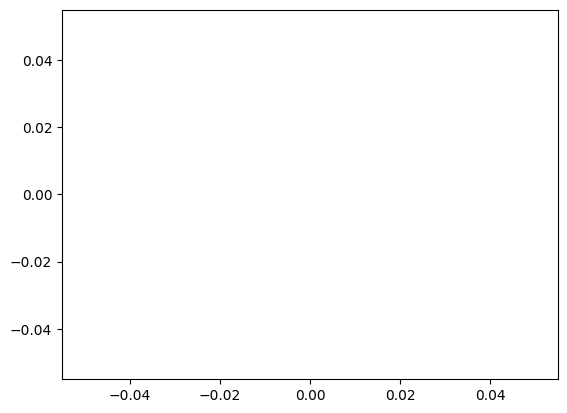

In [64]:
import matplotlib.pyplot as plt 
plt.plot(np.arange(len(impedance[0][20:])), np.abs(impedance[0][20:]))

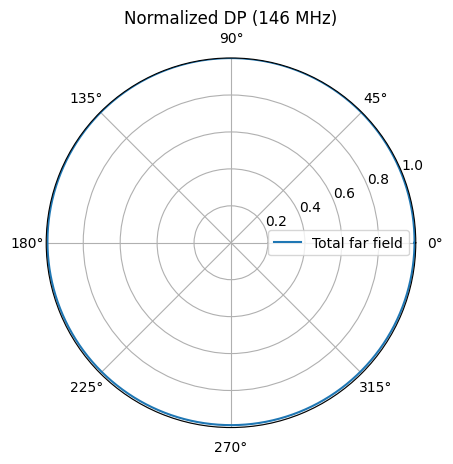

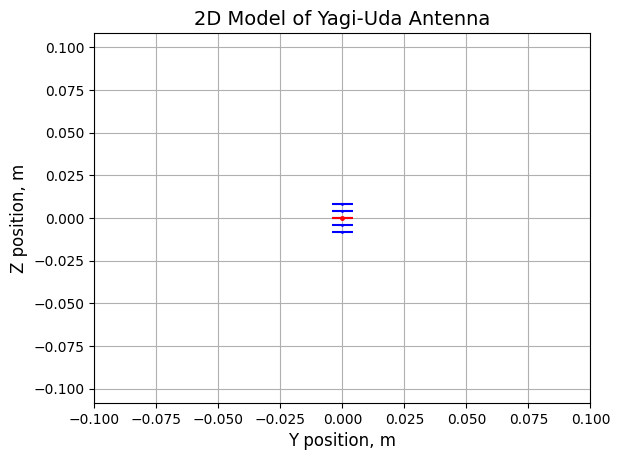

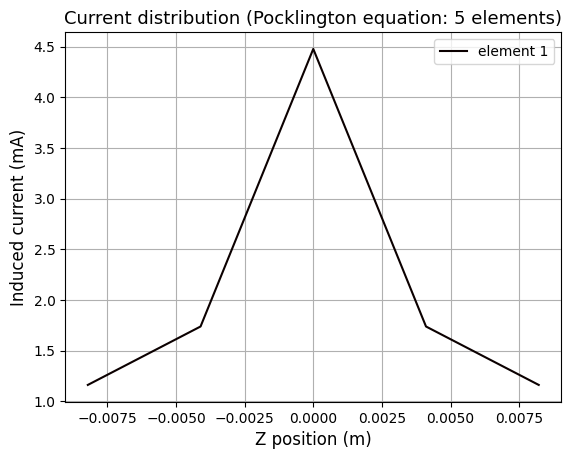

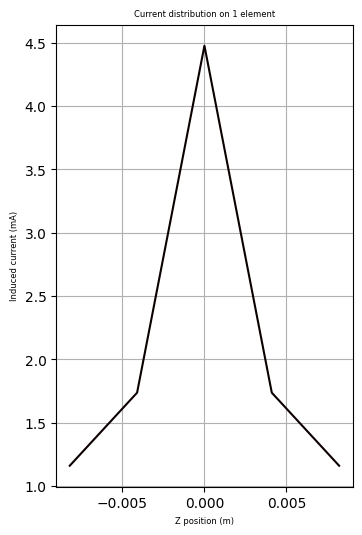

In [65]:
from yagi_visualization import plot_2dmodel, plot_together, plot_separately, current_distribution_2d, current_distribution_3d
import matplotlib.pyplot as plt

plt.polar(phi, E_total/np.max(E_total), label = "Total far field")
plt.title("Normalized DP (146 MHz)")
plt.legend()
plot_2dmodel(R, source_position, sum(element_num), delta_z)
plot_together(R_block, current_block)
plot_separately(R_block, current_block)
current_distribution_2d(R, current)
current_distribution_3d(R, source_position, R_block, current_block)

In [66]:
print(element_length/light_speed * frequency)

[0.008]
